In [8]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
# Загрузка данных
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

In [17]:
# Предобработка данных
train_data['dt'] = pd.to_datetime(train_data['dt'])
test_data['dt'] = pd.to_datetime(test_data['dt'])

In [18]:
# Установим дату в качестве индекса
train_data.set_index('dt', inplace=True)
test_data.set_index('dt', inplace=True)

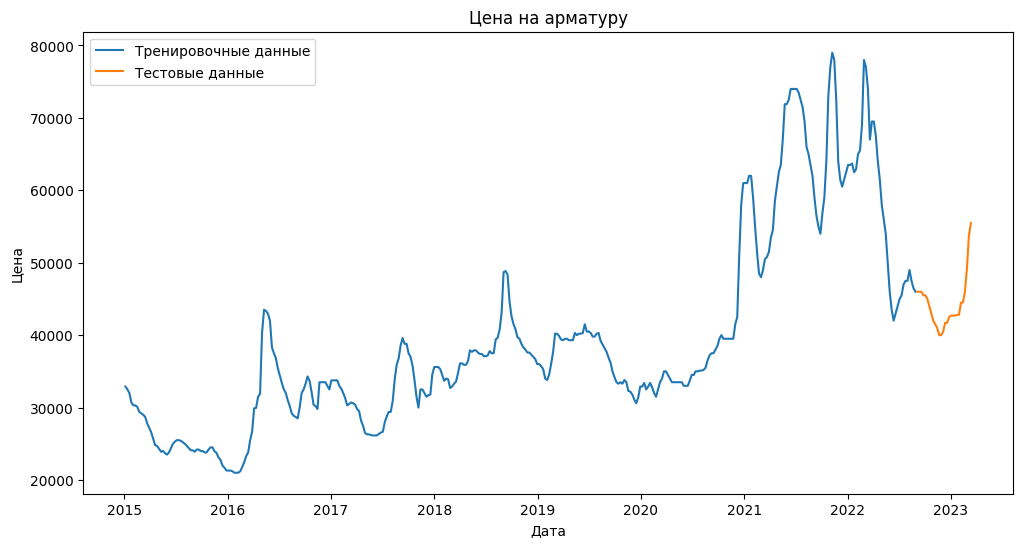

In [19]:
# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(train_data['Цена на арматуру'], label='Тренировочные данные')
plt.plot(test_data['Цена на арматуру'], label='Тестовые данные')
plt.title('Цена на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()


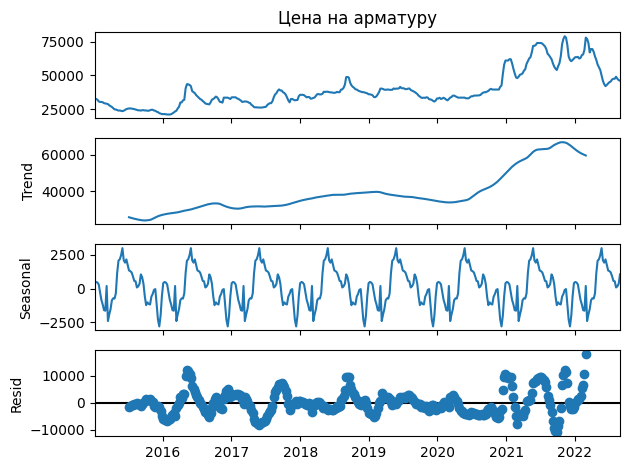

In [20]:
# Декомпозиция временного ряда для анализа тренда и сезонности
decomposition = seasonal_decompose(train_data['Цена на арматуру'], model='additive', period=52)
decomposition.plot()
plt.show()

In [21]:
# Построение модели ARIMA
model = ARIMA(train_data['Цена на арматуру'], order=(5, 1, 0))
model_fit = model.fit()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [22]:
# Прогнозирование на тестовых данных
forecast = model_fit.forecast(steps=len(test_data))

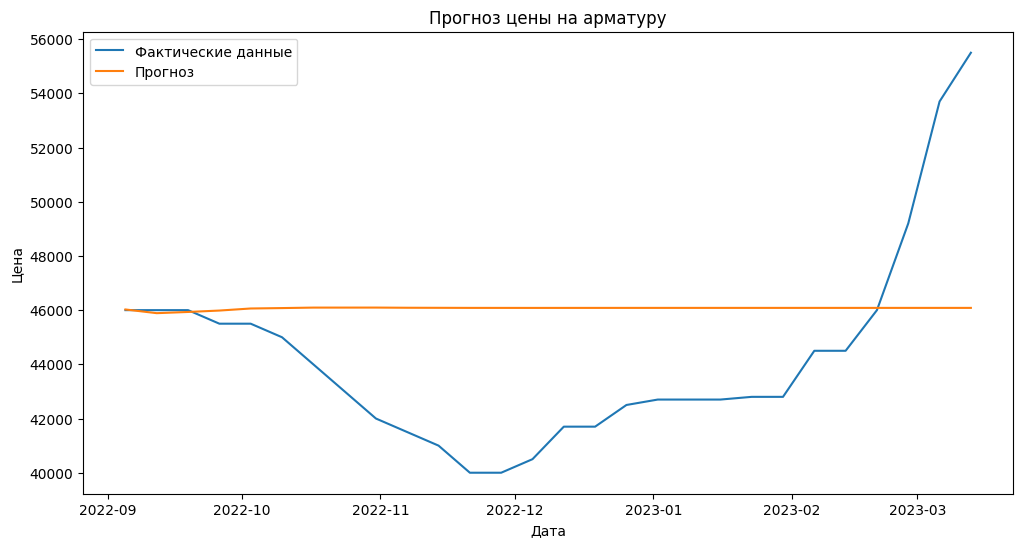

In [23]:
# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Цена на арматуру'], label='Фактические данные')
plt.plot(test_data.index, forecast, label='Прогноз')
plt.title('Прогноз цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [24]:
# Оценка модели
mse = mean_squared_error(test_data['Цена на арматуру'], forecast)
print(f'Среднеквадратичная ошибка (MSE): {mse}')

Среднеквадратичная ошибка (MSE): 16182184.913929516


In [25]:
# Рекомендации по закупке
# Найдем минимальное значение в прогнозе
best_buy_date = forecast.idxmin()
best_buy_price = forecast.min()

In [26]:
print(f'Рекомендуемое время для закупки: {best_buy_date} с прогнозируемой ценой {best_buy_price}')

Рекомендуемое время для закупки: 2022-09-12 00:00:00 с прогнозируемой ценой 45888.37601458411


In [27]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [29]:
# Загрузка данных
data = pd.read_excel('train.xlsx')

In [30]:
# Преобразование данных
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

In [31]:
# Создание признаков
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek

In [32]:
# Сдвиг целевой переменной для создания признаков
data['price_lag1'] = data['Цена на арматуру'].shift(1)
data['price_lag2'] = data['Цена на арматуру'].shift(2)
data['price_lag3'] = data['Цена на арматуру'].shift(3)

In [33]:
# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

In [34]:
# Разделение данных на признаки и целевую переменную
X = data.drop('Цена на арматуру', axis=1)
y = data['Цена на арматуру']

In [35]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [36]:
# Создание и обучение модели
model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 317, number of used features: 6
[LightGBM] [Info] Start training from score 33832.460568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

In [37]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [38]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 126289159.40028544


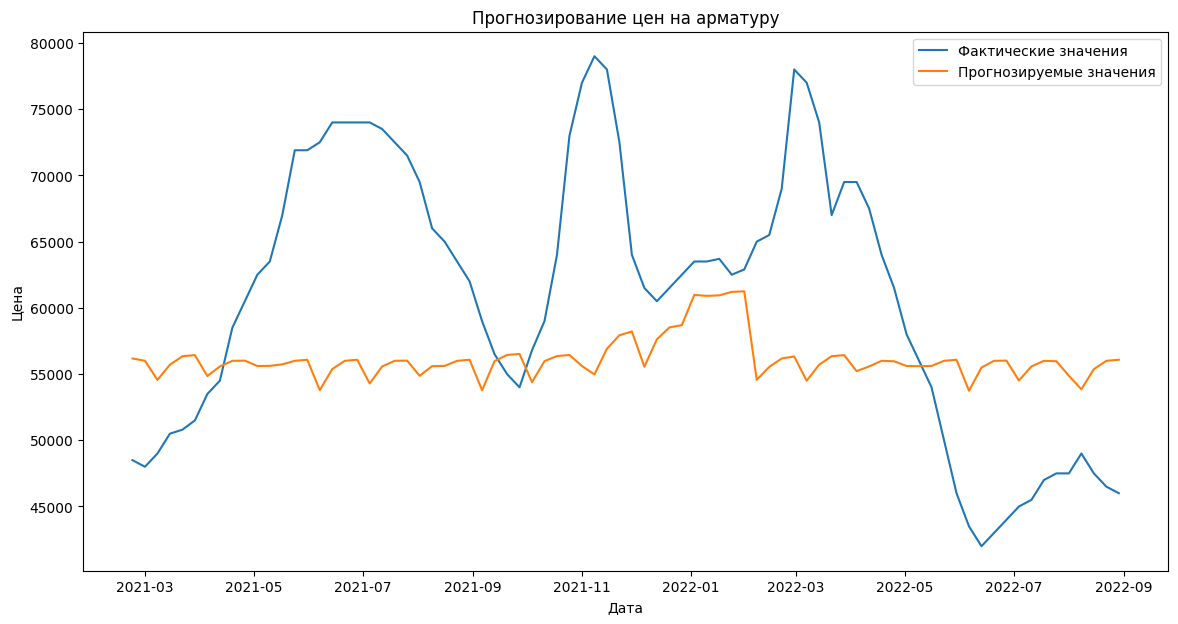

In [39]:
# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Фактические значения')
plt.plot(y_test.index, y_pred, label='Прогнозируемые значения')
plt.legend()
plt.title('Прогнозирование цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

In [40]:
# Рекомендация лучшего времени для закупки
# Найдем минимальное значение прогнозируемой цены
best_time = y_test.index[np.argmin(y_pred)]
print(f'Рекомендуемое время для закупки: {best_time}')

Рекомендуемое время для закупки: 2022-06-06 00:00:00


In [41]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached setuptools-77.0.3-py3-none-any.whl.metadata (6.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Us

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
# 1. Загрузка данных
data = pd.read_excel('train.xlsx', sheet_name='Sheet1')
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)
prices = data['Цена на арматуру'].values.reshape(-1, 1)

In [44]:
# 2. Предобработка данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [45]:
# Создание последовательностей для обучения
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60  # Длина последовательности
X, y = create_sequences(scaled_prices, seq_length)

In [46]:
# Преобразование данных для LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [47]:
# 3. Создание модели LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# Обучение модели
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0978
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0168
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0123
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0123
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0110
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0105
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0093
Epoc

In [49]:
# 4. Прогнозирование
# Используем последние seq_length значений для предсказания
last_sequence = scaled_prices[-seq_length:]
last_sequence = np.reshape(last_sequence, (1, seq_length, 1))

predicted_price = model.predict(last_sequence)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Прогнозируемая цена на арматуру: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Прогнозируемая цена на арматуру: 47148.05078125


In [50]:
# 5. Рекомендации
# Анализ прогнозов для определения лучшего времени для закупки
# Например, можно искать минимальные значения в прогнозах
future_predictions = []
for i in range(30):  # Прогнозируем на 30 дней вперед
    predicted_price = model.predict(last_sequence)
    future_predictions.append(predicted_price[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price]], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

best_day_to_buy = np.argmin(future_predictions)
print(f"Лучший день для закупки: через {best_day_to_buy} дней, цена: {future_predictions[best_day_to_buy][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
# Визуализация прогнозов
plt.plot(future_predictions, label='Прогнозируемые цены')
plt.axvline(x=best_day_to_buy, color='r', linestyle='--', label='Лучший день для закупки')
plt.xlabel('Дни')
plt.ylabel('Цена на арматуру')
plt.legend()
plt.show()